# Yahoo! FINANCEのデータを用いた可視化の演習


* ここからは米国の[Yahoo! FINANCE](https://finance.yahoo.com/)の株価データを用いて相関関係の可視化を行います。

* 今日現在までの直近1年間のtech_stockおよび日系企業の株価データを用います。
* Pythonで`Yahoo! FINANCE`のデータを集めるパッケージ`yfinance`を用います。

```{warning}
ここで用いるパッケージ[yfinance](https://github.com/ranaroussi/yfinance)はYahooが公開しているAPIを利用したオープンソースのツールであり、研究・教育目的での利用を想定しています。
ダウンロードした実際のデータを使用する権利の詳細については、ヤフーの利用規約を参照する必要があります（[Yahoo Developer API Terms of Use](https://legal.yahoo.com/us/en/yahoo/terms/product-atos/apiforydn/index.html); [Yahoo Terms of Service](https://legal.yahoo.com/us/en/yahoo/terms/otos/index.html); [Yahoo Terms](https://policies.yahoo.com/us/en/yahoo/terms/index.htm)）。
```

* ここで紹介する企業以外を試す場合は、[Yahoo! FINANCE](https://finance.yahoo.com/)のページで企業の銘柄コードを確認して置き換えてください。


```{warning}


必要なパッケージをインストールします。すでに、`requirements.txt`を用いてパッケージ類をインストールしている場合は、そのまま次のセルに進んでください。

まだの場合は、<a href="/docs/sec01/02_howtopip.html">こちらのページ</a>を用いてパッケージ類をインストールしてください。もしくは、以下の方法をお試しください。

   1. WinodwsのかたはWindowsのメニューから`Anaconda Propmt`を、Macの方は`Terminal`を起動させ、
      
   2. `conda install git` を入力してエンターを押してください。しばらくすると`Proceed ([y]/n)? `と表示されるので`y`を入力してエンターを押して続行してください。

   3. `pip install git+https://github.com/pydata/pandas-datareader`を入力しエンターを押して、`pandas-datareader`のインストールを実行します。
      
   3. Terminal上で、`pip install yfinance --upgrade --no-cache-dir` を入力しエンターを押して`yfinance`のインストールを実行します。

```

In [6]:
from datetime import datetime
import os
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:

end = datetime.now()
start =  datetime(end.year-1, end.month, end.day)

yf.pdr_override()

tech_stock = ['GOOG', 'AAPL', 'META', 'AMZN', 'NFLX', 'TSLA'] 

for company in tech_stock:
    globals()[company] = pdr.get_data_yahoo(tickers=company, start=start, end=end)

Open：始値<br>
High：高値<br>
Low：安値<br>
Close：終値<br>
Volume：出来高（1日に取引が成立した株の数）<br>
Adj Close：[調整後終値](https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABm20bVaadJmuWaLtnp6QzQCwpE_bTPY1hTdDmAaCgQpJZbpvmWaMHqlWYEgnwyh3FfOHJwtu91jk5ZEOSLevJYuUan19QpMb53UoUn5gZQ845yQPdjRWlMdlhsKSZKhCHWJd_hKiDjztsd_0rJdtzmiGUb3XIbM17AScHCeUs8B)

In [7]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,105.239051,106.824437,103.851722,105.321734,105.321734,2.872537e+07
std,11.840727,11.925898,11.621574,11.740894,11.740894,1.124355e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.749998,97.344997,94.440002,95.835001,95.835001,2.189435e+07
50%,102.924999,104.205002,101.857502,103.549999,103.549999,2.609110e+07
75%,114.084002,116.361376,112.986315,114.588623,114.588623,3.235872e+07
max,143.399506,144.043747,140.943497,143.642502,143.642502,9.779860e+07


In [8]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-04 to 2023-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


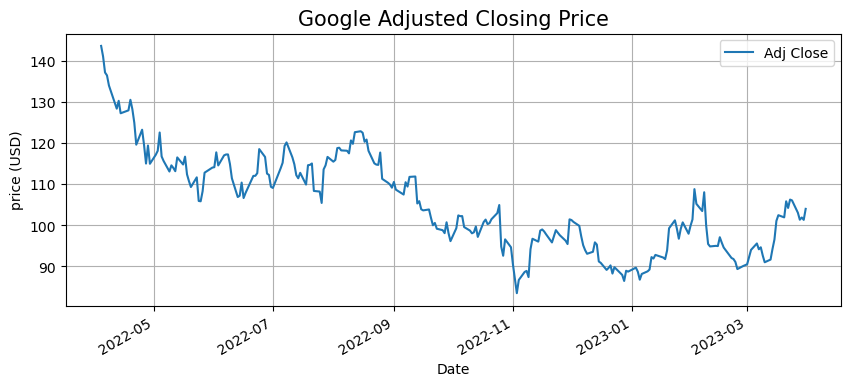

In [9]:
# Google の調整済終値のプロット
GOOG['Adj Close'].plot(legend=True, figsize=(10,4))
plt.title("Google Adjusted Closing Price", fontsize=15)
plt.ylabel('price (USD)')
plt.grid()
plt.show()

In [10]:
# 長い時系列の場合、ある年やある年月を指定して、簡単にデータの一部分を選択することができます。
GOOG['2023-2'] #2023年2月のみを抽出

/var/folders/x2/7ss5kcb12n1gtlpc8p2mtjtw0000gn/T/ipykernel_40083/4106121866.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  GOOG['2023-2'] #2023年2月のみを抽出


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,99.739998,102.190002,98.419998,101.430000,101.430000,26392600
2023-02-02,106.790001,108.820000,106.540001,108.800003,108.800003,46622600
2023-02-03,103.510002,108.019997,103.300003,105.220001,105.220001,36823400
2023-02-06,102.684998,104.699997,102.209999,103.470001,103.470001,25573000
2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600
2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300
2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600


## 移動平均（Moving Average）

時系列データで一定区間ごとの平均値を区間をずらしながら求めたもの

In [11]:
ma_day = [10, 20, 30] # 10日、20日、50日の移動平均の値を持つ新しいcolumn(MA_10, MA_20, MA_50)を作ります
for ma in ma_day:
    for company in [GOOG, AAPL, META, NFLX, AMZN]:
        company['MA_{}'.format(ma)] = company['Adj Close'].rolling(ma).mean() #rolling(日数).mean()で日数の移動平均を求めます

In [12]:
AAPL.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,MA_30
Date,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,177.365555,76468400,NaN,NaN,NaN
2022-04-05,177.500000,178.300003,174.419998,175.059998,174.005905,73401800,NaN,NaN,NaN
2022-04-06,172.360001,173.630005,170.130005,171.830002,170.795380,89058800,NaN,NaN,NaN
2022-04-07,171.160004,173.360001,169.850006,172.139999,171.103500,77594700,NaN,NaN,NaN
2022-04-08,171.779999,171.779999,169.199997,170.089996,169.065842,76575500,NaN,NaN,NaN
2022-04-11,168.710007,169.029999,165.500000,165.750000,164.751968,72246700,NaN,NaN,NaN
2022-04-12,168.020004,169.869995,166.639999,167.660004,166.650497,79265200,NaN,NaN,NaN
2022-04-13,167.389999,171.039993,166.770004,170.399994,169.373962,70618900,NaN,NaN,NaN
2022-04-14,170.619995,171.270004,165.039993,165.289993,164.294739,75329400,NaN,NaN,NaN


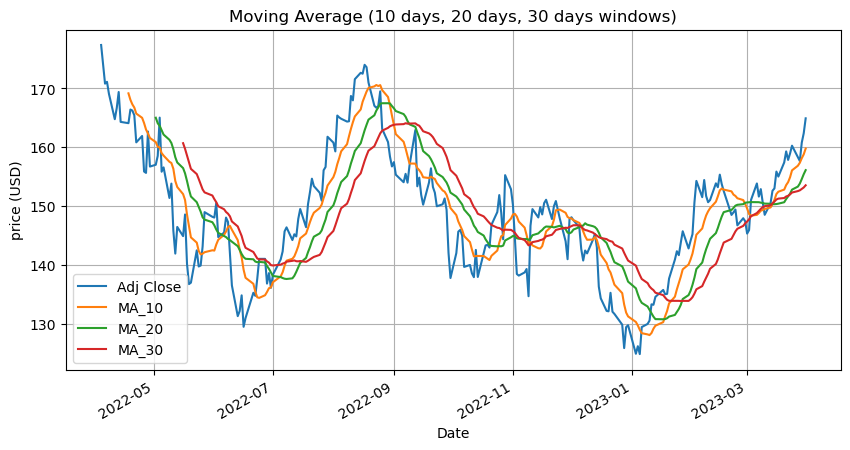

In [13]:
AAPL[['Adj Close','MA_10', 'MA_20','MA_30']].plot(subplots=False, figsize=(10,5))
plt.title('Moving Average (10 days, 20 days, 30 days windows)')
plt.ylabel('price (USD)')
plt.grid()
plt.show()

## 参考: 株価の前日からのパーセント変化を求めます

In [14]:
for company in [GOOG, AAPL, META, AMZN, NFLX,TSLA]:
    company['returns'] = company['Adj Close'].pct_change()

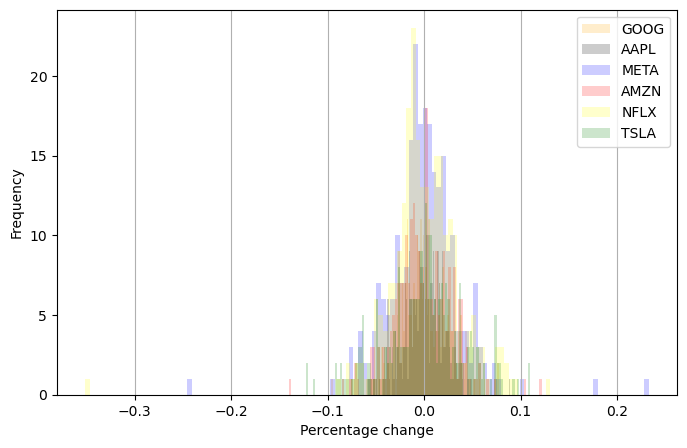

In [15]:
colors = ['orange','black','blue','red','yellow','green']
i=0
plt.figure(figsize=(8,5))
for company in [GOOG, AAPL, META, AMZN, NFLX, TSLA]:
    plt.hist(company['returns'].dropna(),bins=100,color=colors[i],alpha = 0.2, label=tech_stock[i])
    i += 1
plt.legend()
plt.xlabel('Percentage change')
plt.ylabel('Frequency')
plt.grid(axis='x')
plt.show()

ヒストグラムで6社の変化率を上のように示すと、6社とも多くの日で前日からの変化率は??％以内。

6社の終値を格納したDataFrameを作成します

In [16]:
tech_stock_close = pd.DataFrame({'GOOG':GOOG['Adj Close'],
                           'AAPL':AAPL['Adj Close'],
                           'META': META['Adj Close'],
                           'AMZN': AMZN['Adj Close'],
                           'NFLX': NFLX['Adj Close'],
                           'TSLA': TSLA['Adj Close']})
tech_stock_close.describe()

,GOOG,AAPL,META,AMZN,NFLX,TSLA
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,105.321734,149.206150,160.262520,111.589612,263.107480,228.718134
std,11.740894,10.994187,32.933784,18.915807,60.245107,58.783001
min,83.489998,124.829399,88.910004,81.820000,166.369995,108.099998
25%,95.835001,141.965420,133.284996,96.229998,216.862503,190.087498
50%,103.549999,148.892677,163.610001,108.934998,249.205002,224.803329
75%,114.588623,155.844021,184.409996,122.682497,312.449997,276.872505
max,143.642502,177.365555,233.889999,168.346497,391.500000,381.816681


In [17]:
tech_stock_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-04 to 2023-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    250 non-null    float64
 1   AAPL    250 non-null    float64
 2   META    250 non-null    float64
 3   AMZN    250 non-null    float64
 4   NFLX    250 non-null    float64
 5   TSLA    250 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


### GoogleとApple
GoogleとApple の直近1年間の株価終値の相関係数を求めます。

In [18]:
tech_stock_close['GOOG'].corr(tech_stock_close['AAPL'])

0.6484686409506931

GoogleとApple の直近1年間の株価終値の相関行列を示します。

In [19]:
tech_stock_close[['GOOG','AAPL']].corr()

,GOOG,AAPL
GOOG,1.000000,0.648469
AAPL,0.648469,1.000000


GoogleとApple の直近1年間の株価終値の散布図を示します。

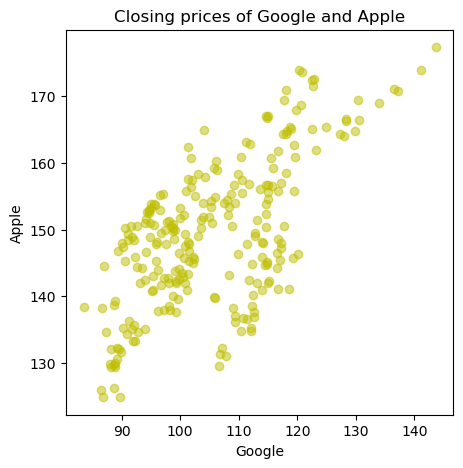

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(tech_stock_close['GOOG'],tech_stock_close['AAPL'],color ='y',alpha=0.5)
plt.xlabel('Google')
plt.ylabel('Apple')
plt.title("Closing prices of Google and Apple")
plt.show()

### ヒストグラムと散布図を１つの図中に示す方法

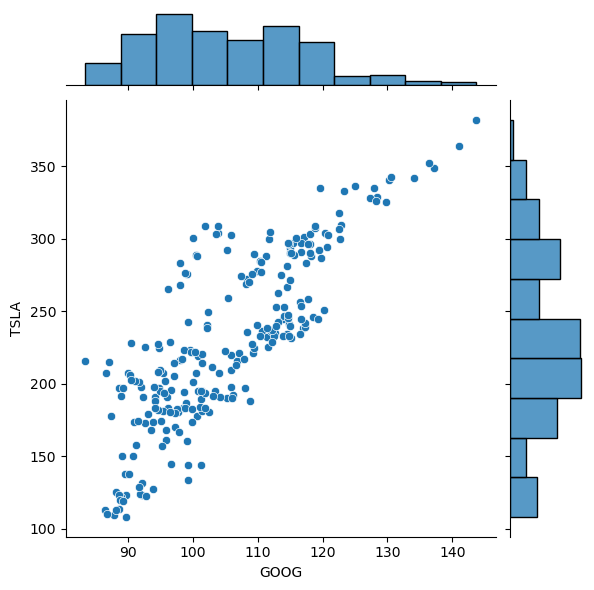

In [21]:
import seaborn as sns

sns.jointplot(data=tech_stock_close, x='GOOG', y='TSLA')
plt.show()

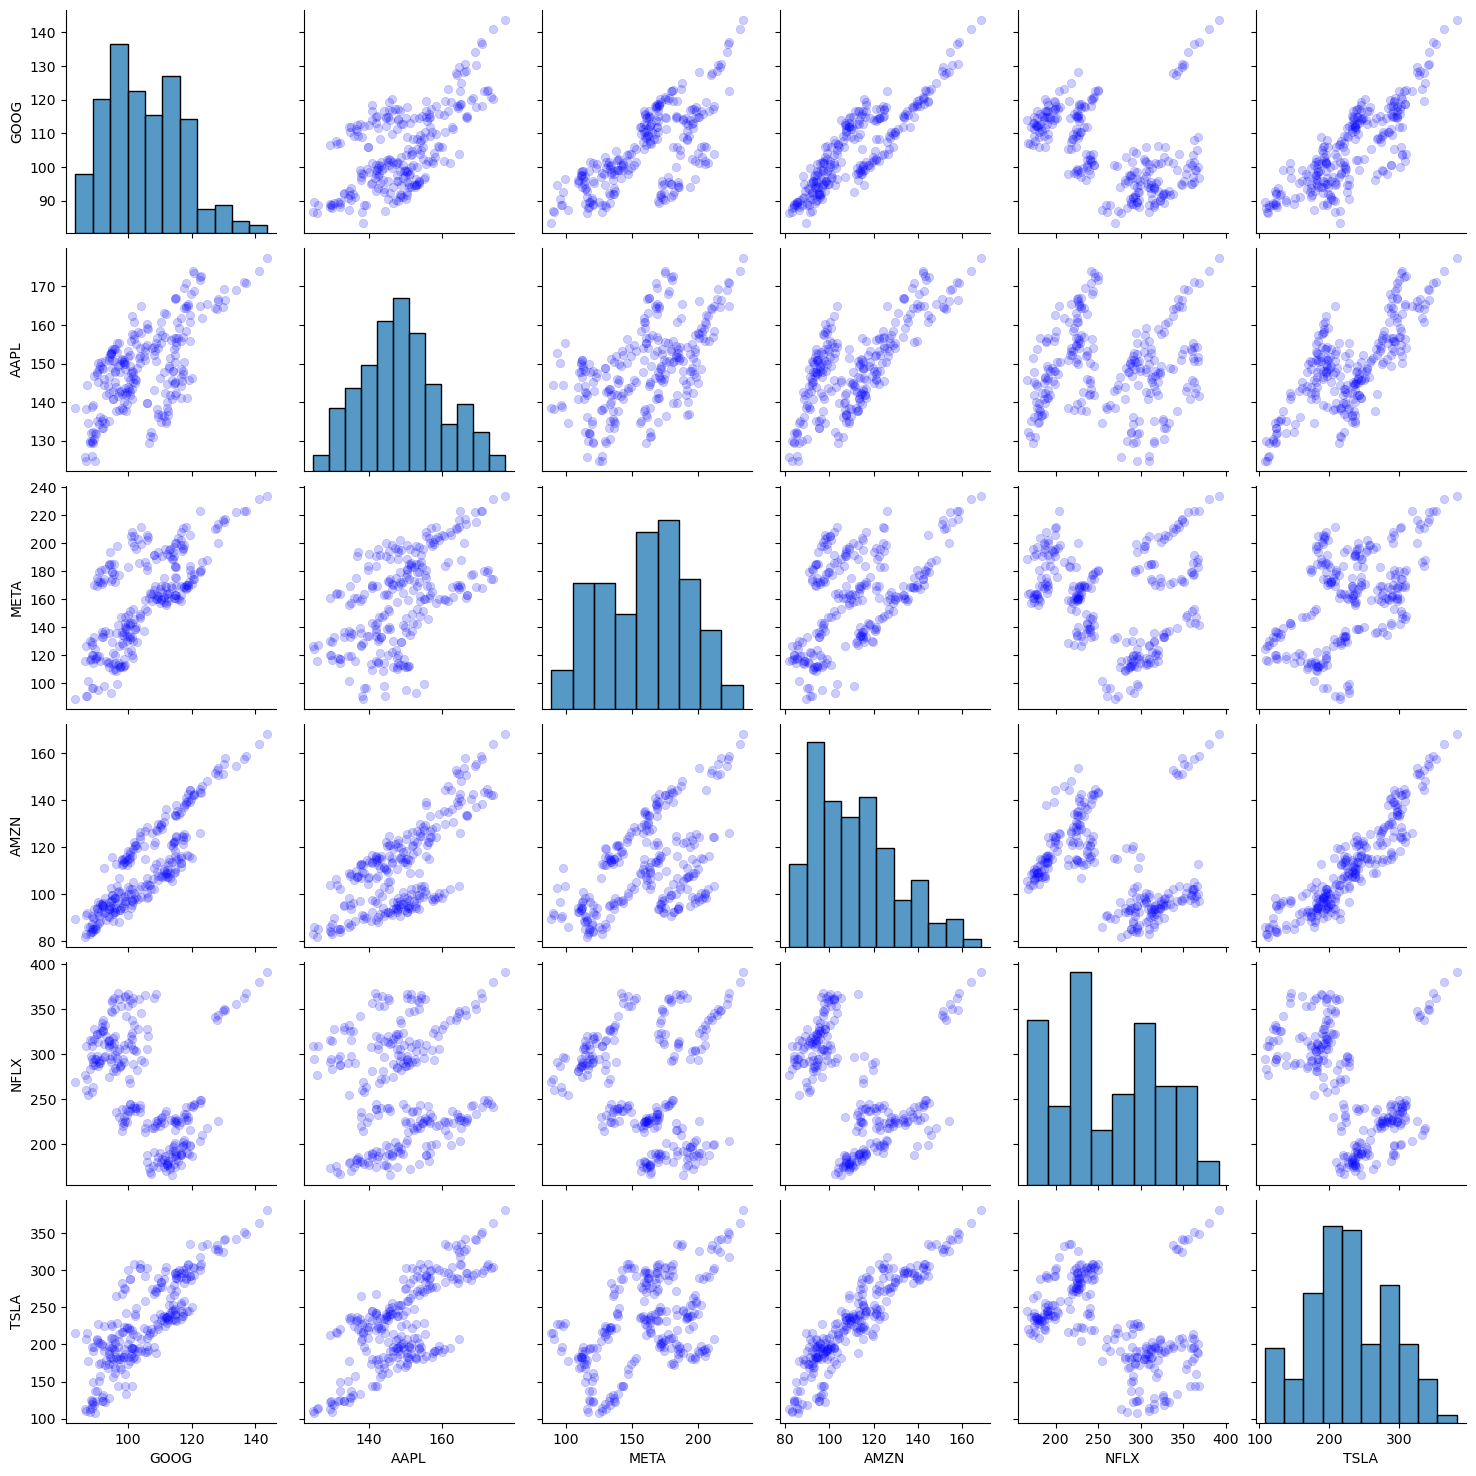

In [22]:
sns.pairplot(tech_stock_close, plot_kws=dict(color = 'b', edgecolor='b', alpha = 0.2))
plt.show()

6社の相関行列を示します。

In [23]:
tech_stock_close.corr()

,GOOG,AAPL,META,AMZN,NFLX,TSLA
GOOG,1.000000,0.648469,0.699805,0.880083,-0.365550,0.822246
AAPL,0.648469,1.000000,0.562384,0.735739,0.092159,0.738738
META,0.699805,0.562384,1.000000,0.531180,-0.102817,0.518957
AMZN,0.880083,0.735739,0.531180,1.000000,-0.283277,0.919084
NFLX,-0.365550,0.092159,-0.102817,-0.283277,1.000000,-0.406252
TSLA,0.822246,0.738738,0.518957,0.919084,-0.406252,1.000000


#### 参考

続いて日本の自動車メーカーのToyota Motor CorporationとHonda Motor Co., Ltd.の直近1年の株価も収集します。

In [24]:
end = datetime.now()
start =  datetime(end.year-1, end.month, end.day)

yf.pdr_override()

vehicles = ['TM', 'HMC'] # TM : Toyota Motor Corporation, HMC: Honda Motor Co., Ltd.
for company in vehicles:
    globals()[company] = pdr.get_data_yahoo(tickers=company, start=start, end=end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
print(TM.info(), HMC.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-04 to 2023-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-04 to 2023-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None None


In [26]:
tm_hmc = pd.DataFrame({'TM':TM['Adj Close'],'HMC':HMC['Adj Close']})
tech_stock_th = pd.concat([tech_stock_close, tm_hmc], axis=1)

In [27]:
tech_stock_th.sample(4)

,GOOG,AAPL,META,AMZN,NFLX,TSLA,TM,HMC
Date,,,,,,,,
2022-05-09,113.084000,151.366486,196.210007,108.789001,173.100006,262.369995,168.470001,25.351183
2023-03-27,103.059998,158.279999,202.839996,98.040001,327.660004,191.809998,136.960007,25.870001
2022-11-09,87.400002,134.664383,101.470001,86.139999,254.660004,177.589996,134.529999,22.360001
2023-02-21,92.050003,148.479996,172.080002,94.580002,337.500000,197.369995,139.179993,25.900000


In [ ]:
# データを保存
os.makedirs('./data', exist_ok=True)
tech_stock_close.to_csv('./data/tech_stock_close.csv')
tech_stock_close.to_pickle('./data/tech_stock_close.pkl')

tech_stock４社と自動車メーカー２社の相関行列を示します。

In [28]:
tech_stock_th.corr()

,GOOG,AAPL,META,AMZN,NFLX,TSLA,TM,HMC
GOOG,1.000000,0.648469,0.699805,0.880083,-0.365550,0.822246,0.865843,0.514418
AAPL,0.648469,1.000000,0.562384,0.735739,0.092159,0.738738,0.437171,0.696059
META,0.699805,0.562384,1.000000,0.531180,-0.102817,0.518957,0.620568,0.723022
AMZN,0.880083,0.735739,0.531180,1.000000,-0.283277,0.919084,0.681869,0.428811
NFLX,-0.365550,0.092159,-0.102817,-0.283277,1.000000,-0.406252,-0.397727,0.074435
TSLA,0.822246,0.738738,0.518957,0.919084,-0.406252,1.000000,0.649572,0.440536
TM,0.865843,0.437171,0.620568,0.681869,-0.397727,0.649572,1.000000,0.535174
HMC,0.514418,0.696059,0.723022,0.428811,0.074435,0.440536,0.535174,1.000000


### 参考: ヒートマップで相関関係を示す

変数が多い場合視覚的にわかりやすい

/var/folders/x2/7ss5kcb12n1gtlpc8p2mtjtw0000gn/T/ipykernel_40083/1290747193.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


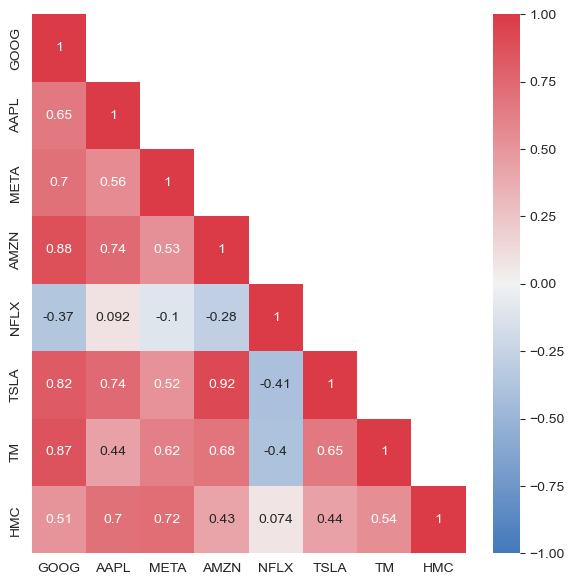

In [29]:
def CorrMtx(df, dropDuplicates = True):

    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask,1)] = True

    sns.set_style(style = 'white')

    fig, ax = plt.subplots(figsize=(7, 7))

    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    if dropDuplicates:
        sns.heatmap(df, mask=mask, vmin=-1, vmax=1,annot=True,cmap=cmap)
    else:
        sns.heatmap(df, vmin=-1, vmax=1,annot=True,cmap=cmap)


CorrMtx(tech_stock_th.corr(), dropDuplicates = True)

AppleとToyotaの散布図を示します。

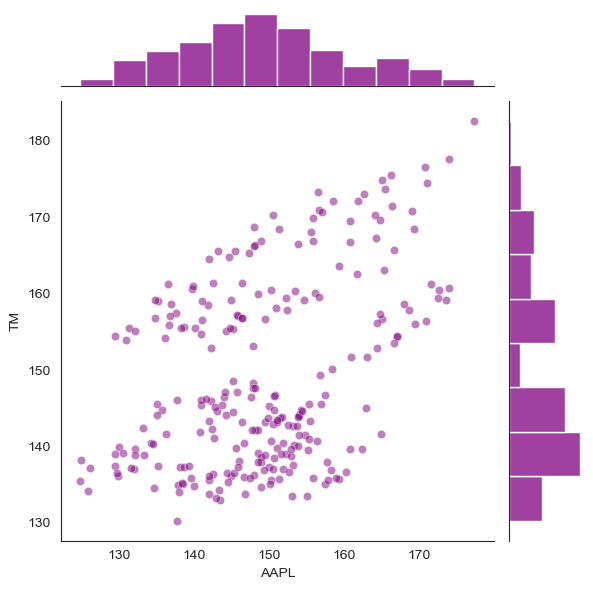

In [30]:
sns.jointplot(x='AAPL', y='TM', data=tech_stock_th, color="purple", alpha = 0.5)
plt.show()

HondaとToyotaの散布図を示します。

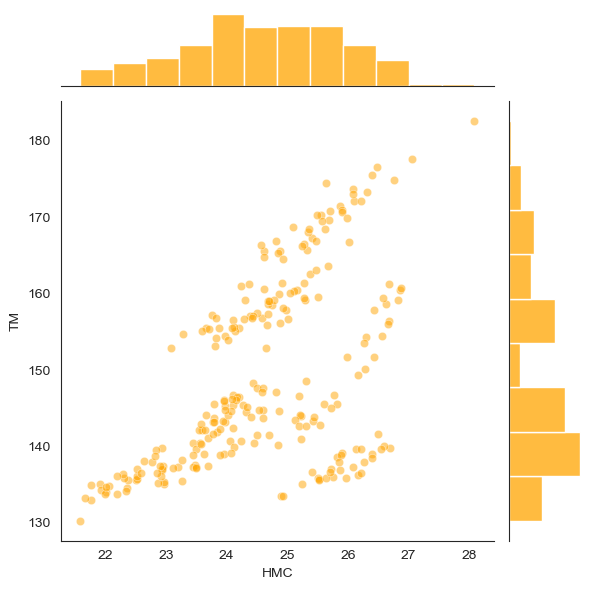

In [31]:
sns.jointplot(x='HMC', y='TM', data=tech_stock_th, color="orange", alpha = 0.5)
plt.show()

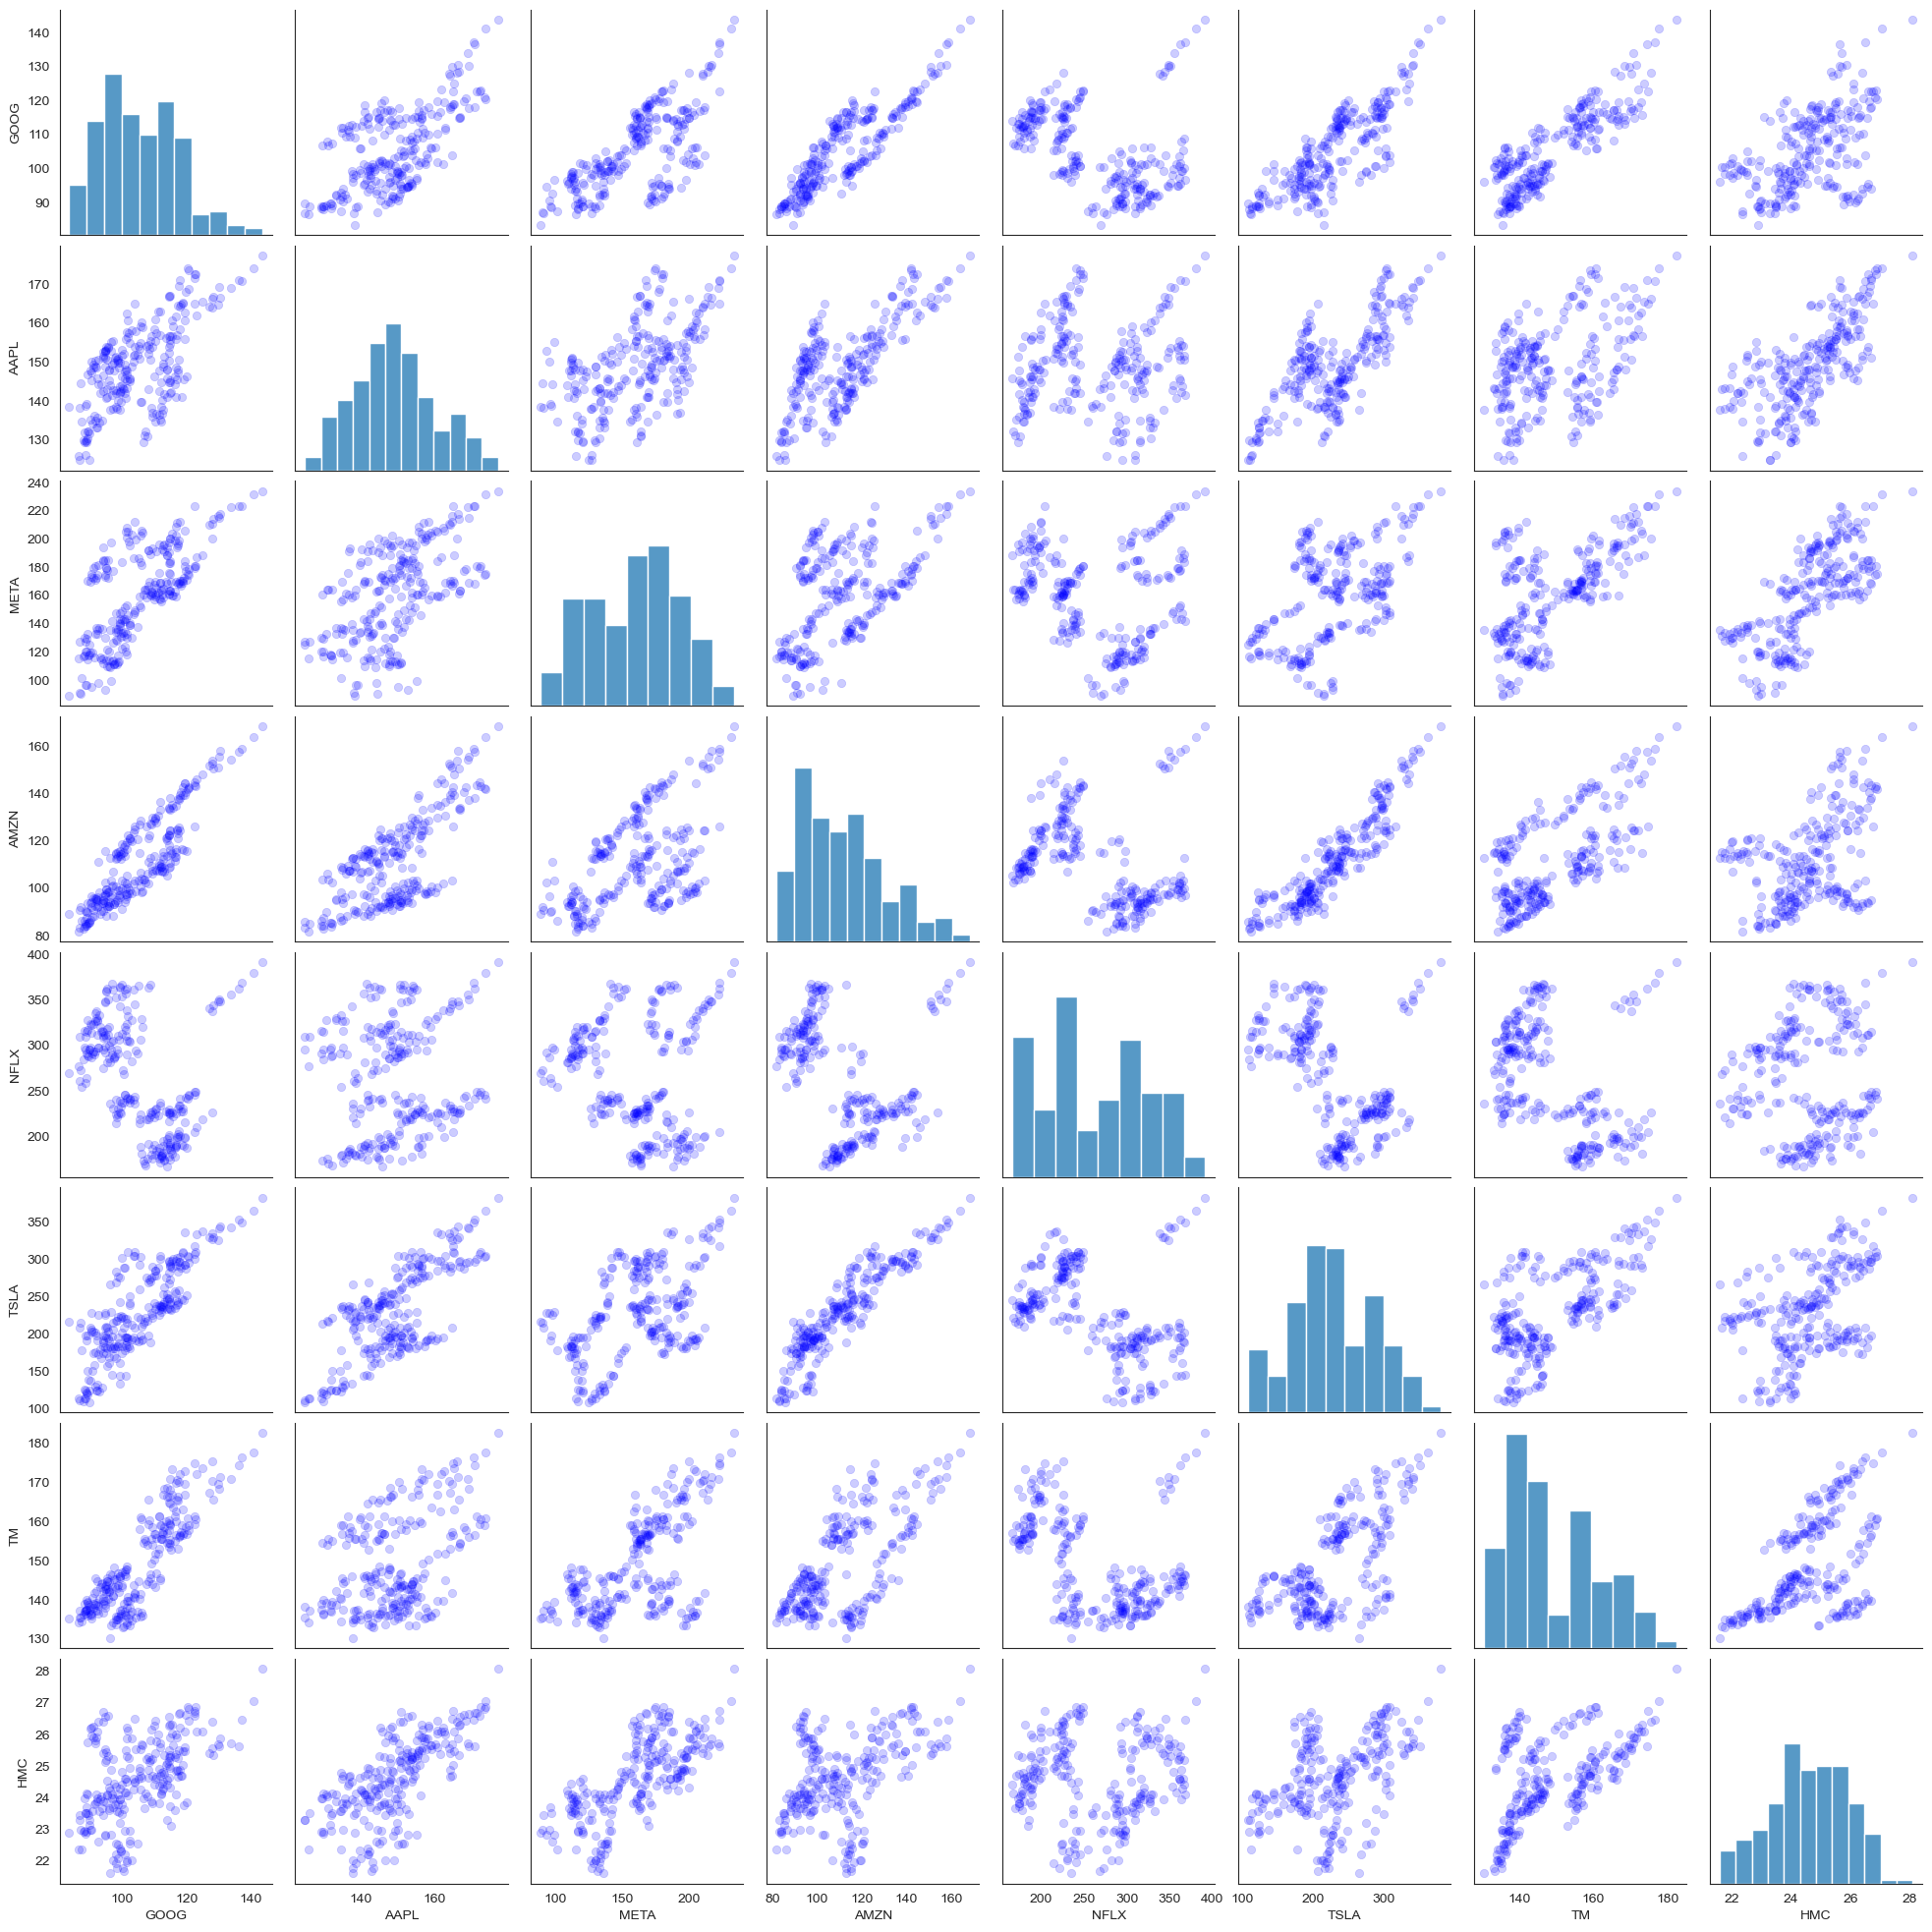

In [32]:
sns.pairplot(tech_stock_th, plot_kws=dict(color = 'blue', edgecolor='b', alpha = 0.2))
plt.show()

### 参考：ロウソクチャートを描く

```{note}
以下`cufflinks`というパッケージを用いて可視化を行います。
`requirements.txt`を用いて必要なパッケージをすでにインストールしている場合は、次のセルに進んでください。インストール方法はこちら{doc}`/docs/sec01/02_howtopip`をご確認ください。

まだの場合などは、`pip install cufflinks`をターミナルで実行しcufflinksをインストールてから次のセルを実行してください。
```

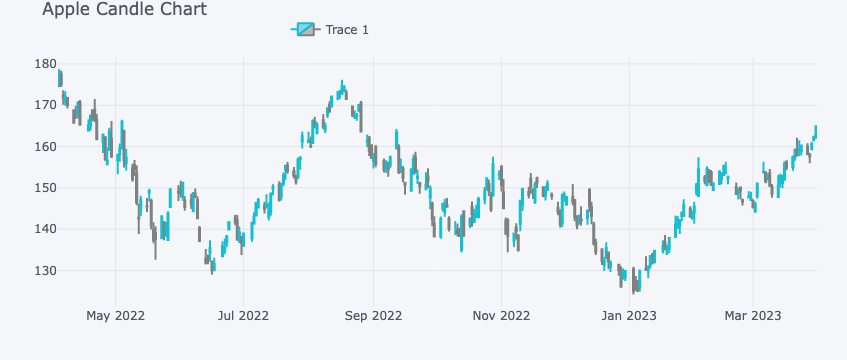

In [41]:
import cufflinks as cf
cf.set_config_file(offline=True)

qf = cf.QuantFig(AAPL, legend='top', title = 'Apple Candle Chart')
qf.iplot()

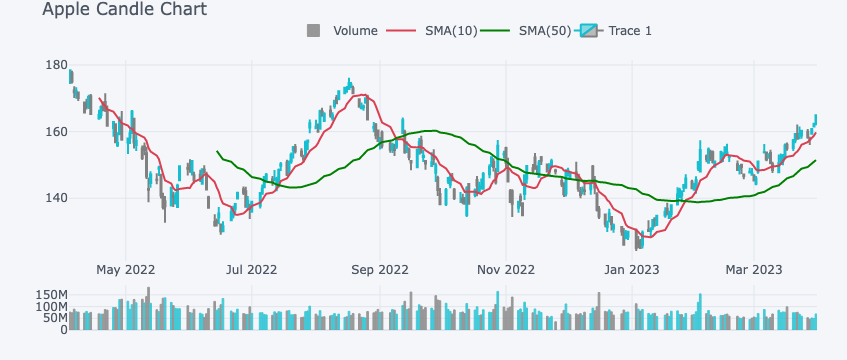

In [42]:
qf = cf.QuantFig(AAPL, legend='top', title = 'Apple Candle Chart')
qf.add_volume()  # 出来高もプロット
qf.add_sma([10,50],width=2, color=['red', 'green'])  # 移動平均線もプロット
qf.iplot()